# LotoBot Statistics Algorithms
-------------------------------------

It assumes that the data was already extracted to JSON or CSV (check the README and try the JS in data's folder). 

It approach is about to try to get the break even, which means that it is not required to take profit, but expect to at least to do not lose money & earns/take profit as possible. 

__Obs.:__ IF no module found, remember activate pyenv.

Strategies used to:

__Generate it Numbers__
1. <a href="#Random-Numbers">Random (preventing duplicate bets)</a>
1. <a href="#Cloned-Bets">Cloned Bet (Based on previous results)</a>

__Spray the Budget__
1. <a href="#Big-Bets">Big Bet</a>
1. <a href="#Batch-of-Bets">Batch of Bets</a>
1. <a href="#Max-Mixed-Bets">Max Mixed Bets</a>
1. <a href="#Most-Rolled-Numbers">Most Rolled Numbers</a>

To prove it, it might show up some statistics:

__Histograms__
1. Earnings
1. Numbers right
1. Break even achieved or not

__Pie Chart__
1. Cloned Bets (history, not generated)

# Load Mined Lotery Data

In [1]:
import os
import locale
# import pprint
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print('Locale set to:')
locale.setlocale(locale.LC_ALL, 'pt_BR')

Locale set to:


'pt_BR'

In [2]:
load_data_start_time = datetime.datetime.now()

data_path = 'data'
draws_data_path = data_path+'/drawns.json'

current_folder = os.path.abspath(os.path.dirname('__file__'))
complete_bets_path = os.path.join(current_folder, draws_data_path)

drawns_df = pd.read_json(complete_bets_path)
drawns_df

,date,id,results,statistics
0,2003-09-29,1,"[18, 20, 25, 23, 10, 11, 24, 14, 06, 02, 13, 0...","{'rolls': '0,00', 'winners_amount': {'11': '25..."
1,2003-06-10,2,"[23, 15, 05, 04, 12, 16, 20, 06, 11, 19, 24, 0...","{'rolls': '0,00', 'winners_amount': {'11': '47..."
2,2003-10-13,3,"[20, 23, 12, 08, 06, 01, 07, 11, 14, 04, 16, 1...","{'rolls': '0,00', 'winners_amount': {'11': '60..."
3,2003-10-20,4,"[16, 05, 25, 24, 23, 08, 12, 02, 17, 18, 01, 1...","{'rolls': '0,00', 'winners_amount': {'11': '70..."
4,2003-10-27,5,"[15, 13, 20, 02, 11, 24, 09, 16, 04, 23, 25, 1...","{'rolls': '0,00', 'winners_amount': {'11': '86..."
5,2003-03-11,6,"[23, 19, 01, 05, 07, 21, 16, 10, 15, 25, 06, 0...","{'rolls': '0,00', 'winners_amount': {'11': '88..."
6,2003-10-11,7,"[22, 04, 15, 08, 16, 14, 21, 23, 12, 01, 25, 1...","{'rolls': '0,00', 'winners_amount': {'11': '96..."
7,2003-11-17,8,"[19, 16, 18, 09, 13, 08, 05, 25, 17, 10, 06, 1...","{'rolls': '0,00', 'winners_amount': {'11': '92..."
8,2003-11-24,9,"[21, 04, 17, 05, 03, 13, 16, 09, 20, 24, 25, 1...","{'rolls': '0,00', 'winners_amount': {'11': '11..."
9,2003-01-12,10,"[24, 19, 08, 23, 06, 02, 20, 11, 09, 03, 04, 1...","{'rolls': '0,00', 'winners_amount': {'11': '11..."


In [3]:
load_data_end_time = datetime.datetime.now()
time_diff = int(abs(load_data_end_time - load_data_start_time).total_seconds()*1000)
"Data loaded after " + "{:n}".format(time_diff) + " ms"

'Data loaded after 277 ms'

# Data Statistics

What the data says, a look in the history before start the trials generator

### History Cloned Results - PieChart 

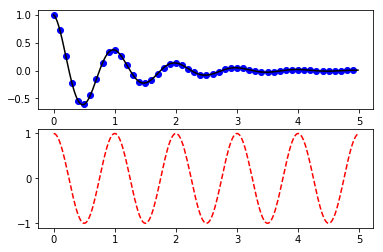

In [4]:
# for drawn in drawns_df:
#     drawn['results']

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

# Settings (config)
---------------

Create the bet rules variables

1. Trials (a list of bets (list of rolls) to prevent duplicate bet)
1. Max rolls per bet: 15 (default), 16, ... 
1. Price for each bet, by amount of rolls (numbers)
1. Possible rolls (numbers): 1 to 25
1. Max Investment per draw
1. Max period investiment (month spend)

In [12]:
# list of bets by type (populate by algorithms forward)
trials = {
    'random': [], #random rolls bets strategy
    'cloned': [], #cloned bets strategy
    'max_mix': [] #max_mix bets strategy
} 

bet_types = {
    '15': 2, # R$2,00
    '16': 32, # R$ 32,00
    '17': 272, # R$ 272,00
    '18': 1632 # R$ 1.632,00
}

max_investment = 64 # R$ 64,00 per week (R$ 256 per month)
max_period_investment = max_investment * 4 # max month spend
possible_rolls = range(1,25) # 26 to include 25 in the range
min_bet_rolls = 15 # how much roll per bet (change the price)
max_bet_rolls = 18 # how much roll per bet (change the price)
max_total_investment = max_period_investment + bet_types['17'] + bet_types['18'] # add unique bet for expensive
spend_per_strategy = max_total_investment/len(trials.keys())
str_spend_per_strategy = locale.currency(spend_per_strategy, grouping=True, symbol=None)

print('Max Month Spend: R$'+locale.currency(max_total_investment, grouping=True, symbol=None))
print('Max Spend per Strategy: R$'+str_spend_per_strategy)

Max Month Spend: R$2.160,00
Max Spend per Strategy: R$720,00


# Random Numbers

### Prevent Duplicated Bet

In [6]:
def duplicated(bet, type_trials):
    return

### Generate Random Numbers

In [7]:
# def gen_random_rolls_bet:
#     global trials
#     type_trials = trials['random']
    
#     while True:
#         bet = None
#         if not duplicated(bet):
#             break

# Cloned Bets

# Max Mixed Bets

# Most Rolled Numbers

# Big Bets

# Batch of Bets